## Chemical equations

$$   P \xrightarrow{ \gamma} P + RNA, $$

$$   P + S  \xrightarrow{k}  P + S + mRNA,$$

$$   mRNA \xrightarrow{k_2} mRNA  + A$$

$$ P + A \underset{k_{off3}}{\overset{k_{on3}}{\rightleftharpoons}}  C_4$$

$$ C_4 + A \underset{k_{off4}}{\overset{k_{on4}}{\rightleftharpoons}}  C_2$$
  
$$RNA \xrightarrow{\delta_2} \o$$

$$A \xrightarrow{\delta} \o$$

$$C2\xrightarrow{\delta_5} \o$$

$$C4\xrightarrow{\delta_6} \o$$

$$ ptot=P+C_2+C_4$$

$$ P=ptot-(C_2+C_4) $$  

$$ P=1-(C_2+C_4) $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.integrate import odeint

t=np.arange(0,1440,0.01)

import pylab
from pylab import *

## Total A

C:\Anaconda2\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


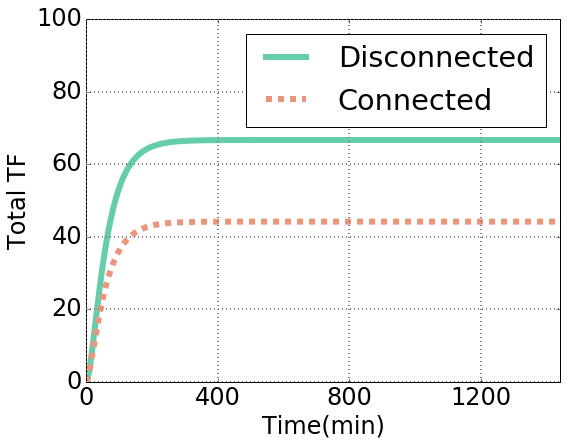

In [2]:
#Time and intervals
t=np.arange(0,1440,0.01)



#Parameters
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; d4=d; k=0.09/50; k2=0.8;
a=0.01; 
k3=0.5

ptot2=300


kon1=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff1=50*60;


kon2=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff2=0.03*60;

ptot1=0

#####################
#Initial conditions

xob = [0, 0, 0, 0, 0]
xoR = [0, 0, 0, 0, 0]
#####################

#ODEs

def f_1(x,t): 
    return (k2*x[1]-2*kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
soln=odeint(f_1,xob,t)

def f_R(x,t): 
    return (k2*x[1]-2*kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
solnR=odeint(f_R,xoR,t)
##############
##############

#Plot parameters
pylab.ylim([0,100]) #y axis limits
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 24}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=24) 
matplotlib.rc('ytick', labelsize=24)
plt.xticks(np.arange(0, 1440, 400.0))
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
######
#Things to plot

p1, =plot(t,soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4], color = '#66cdaa', lw=6)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4], "--",color = '#e9967a',lw=6)
#######

#Labels and grids
xlabel('Time(min)')
ylabel('Total TF')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Total_A_seq_bind_S_50_deg_weak_CSB.eps',format="eps")
#
show()




C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: invalid value encountered in divide


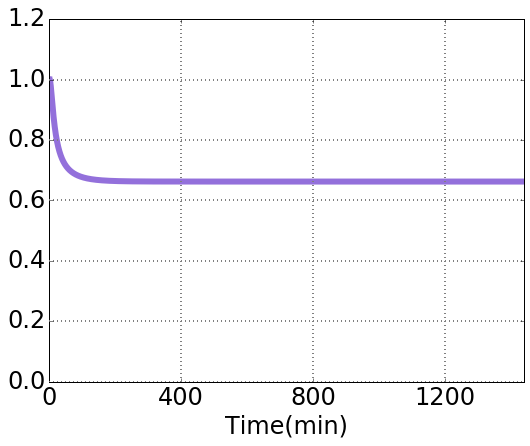

In [3]:
#Ratios plot

#Set plot
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
#Variable to calculate prior plotting
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4])/(soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4])
######
#Kepping this for the plot of ratios
a1=cosa
######
#Plotting the variable
plt.xticks(np.arange(0, 1440, 400.0))
plot(t,cosa, color = '#9370db', lw=6)

#Labels and grids
xlabel('Time(min)')
grid('on',lw=2, color="gray")
pylab.ylim([0,1.2])
fig.savefig('Total_A_seq_bind_S_50_deg_ratio_weak_CSB.eps',format="eps")
show()

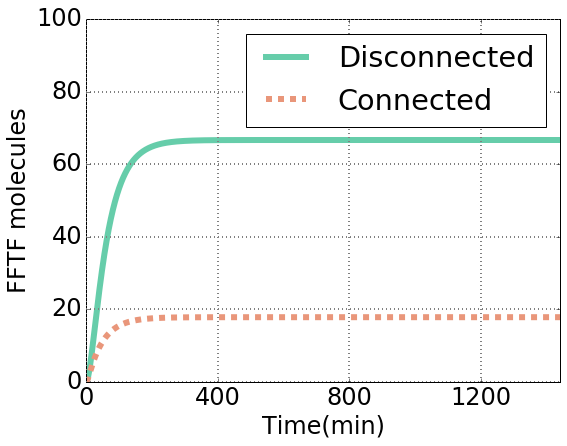

In [4]:


pylab.ylim([0,100])
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 24}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=24) 
matplotlib.rc('ytick', labelsize=24)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

plt.xticks(np.arange(0, 1440, 400.0))
p1, =plot(t,soln[:,0], color = '#66cdaa', lw=6)
p2, =plot(t,solnR[:,0], "--",color = '#e9967a',lw=6)

xlabel('Time(min)')
ylabel('FFTF molecules')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Free_A_seq_bind_no_dim_S_50_Det_weak.eps',format="eps")
show()

In [5]:
#numpy.sum(d**2)
five=solnR[:,0]
four=soln[:,0]
dis=abs(five[5:1440]-four[5:1440])
s=abs(five[5:1440]+four[5:1440])
Canb=dis/s
import numpy
numpy.sum(Canb)

248.96579947117681

In [6]:
import random
import copy
rand = copy.copy(four)
random.shuffle(rand)
rand
dis2=abs(four[5:1440]-rand[5:1440])
s2=abs(four[5:1440]+rand[5:1440])
Canb2=dis2/s2
numpy.sum(Canb2)

1334.817946595072

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in divide


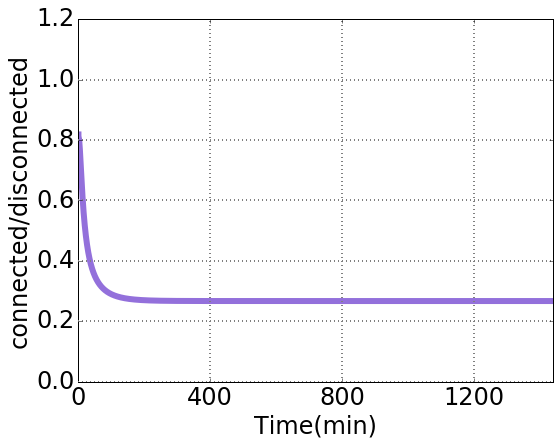

In [7]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

cosa=(solnR[:,0])/(soln[:,0])

#a1=cosa
plt.xticks(np.arange(0, 1440, 400.0))
plot(t,cosa, color = '#9370db', lw=6)

xlabel('Time(min)')
grid('on',lw=2, color="gray")
pylab.ylim([0,1.2])
ylabel('connected/disconnected')
fig.savefig('Free_A_seq_bind_no_dim_S_50_deg_ratio_Det_weak.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in divide


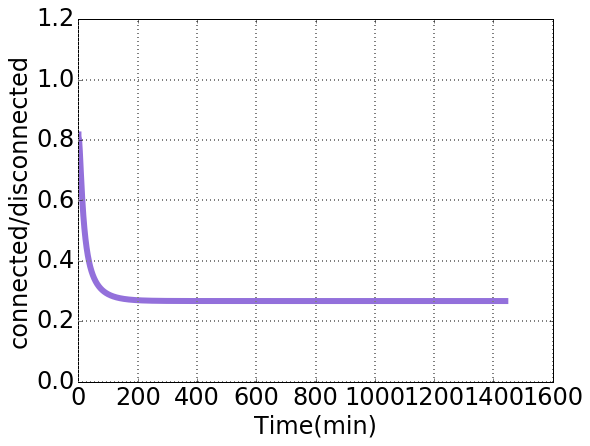

In [8]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

cosa=(solnR[:,0])/(soln[:,0])

c1=cosa

plot(t,cosa, color = '#9370db', lw=6)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,1.2])
#fig.savefig('Free_A_seq_bind_weak_S_50_deg_ratio_GRAPH2.eps',format="eps")
show()

## Total A kon=10kon

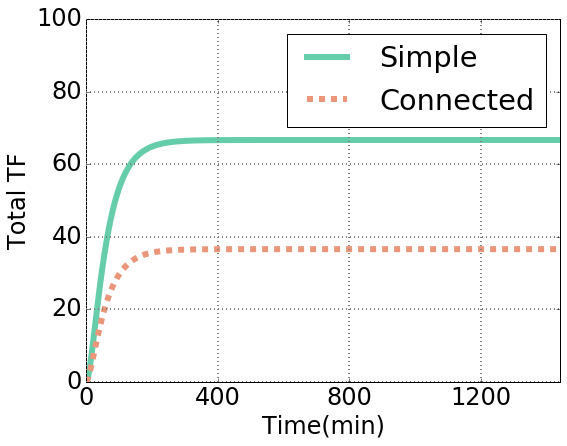

In [9]:

t=np.arange(0,1440,0.01)


ptot2=300
kon=0; koff=0;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=0; kundim=0
k3=0.5
d4=0.02;


kon1=10*(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff1=50*60;


kon2=10*(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff2=0.03*60;

ptot1=0

#####################
#Initial conditions

xob = [0, 0, 0, 0, 0]
xoR = [0, 0, 0, 0, 0]
#####################

#ODEs

def f_1(x,t): 
    return (k2*x[1]-2*kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
soln=odeint(f_1,xob,t)

def f_R(x,t): 
    return (k2*x[1]-2*kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
solnR=odeint(f_R,xoR,t)
##############

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 24}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=24)
matplotlib.rc('ytick', labelsize=24)
plt.xticks(np.arange(0, 1440, 400.0))
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

p1, =plot(t,soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4], color = '#66cdaa', lw=6)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4], "--",color = '#e9967a',lw=6)

xlabel('Time(min)')
ylabel('Total TF')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=1)
fig.savefig('Total_A_seq_dim_S_50_deg_strong_100kon_CSB.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in divide


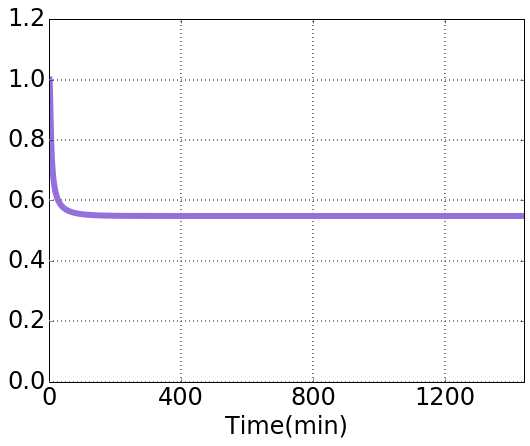

In [10]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4])/(soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4])

b1=cosa
plt.xticks(np.arange(0, 1440, 400.0))
plot(t,cosa, color = '#9370db', lw=6)

xlabel('Time(min)')
grid('on',lw=2, color="gray")
pylab.ylim([0,1.2])
fig.savefig('Total_A_seq_dim_S_50_strong_100kon_ratio_CSB.eps',format="eps")
show()

In [11]:
#numpy.sum(d**2)
five=solnR[:,0]
four=soln[:,0]
dis=abs(five[5:1440]-four[5:1440])
s=abs(five[5:1440]+four[5:1440])
Canb=dis/s
import numpy
numpy.sum(Canb)

1032.9965896921094

In [12]:
import random
import copy
rand = copy.copy(four)
random.shuffle(rand)
rand
dis2=abs(four[5:1440]-rand[5:1440])
s2=abs(four[5:1440]+rand[5:1440])
Canb2=dis2/s2
numpy.sum(Canb2)

1338.1647202970507

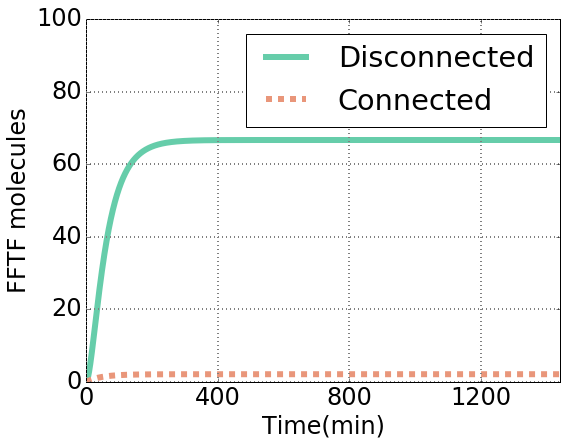

In [13]:
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

plt.xticks(np.arange(0, 1440, 400.0))
p1, =plot(t,soln[:,0], color = '#66cdaa', lw=6)
p2, =plot(t,solnR[:,0], "--",color = '#e9967a',lw=6)

xlabel('Time(min)')
ylabel('FFTF molecules')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Free_A_seq_dim_no_dim_S_50_deg_strong_100_scale_100kon_Det_strong_1.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in divide


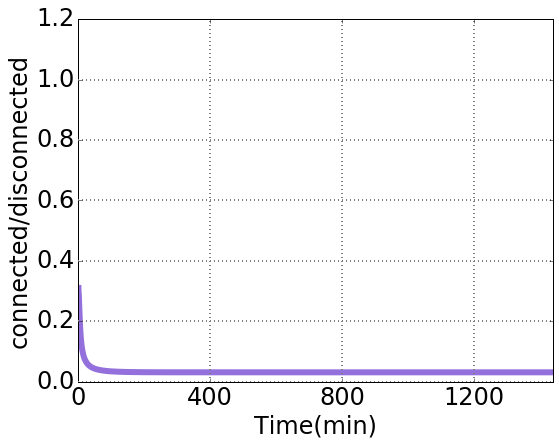

In [14]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

cosa=(solnR[:,0])/(soln[:,0])

l1=cosa
plt.xticks(np.arange(0, 1440, 400.0))
plot(t,cosa, color = '#9370db', lw=6)

xlabel('Time(min)')
grid('on',lw=2, color="gray")
pylab.ylim([0,1.2])
xlabel('Time(min)')
ylabel('connected/disconnected')
fig.savefig('Free_A_seq_bind_no_dim_S_50_100kon_deg_ratio_strong_Det_strong_1.eps',format="eps")
show()

## Total A koff/10

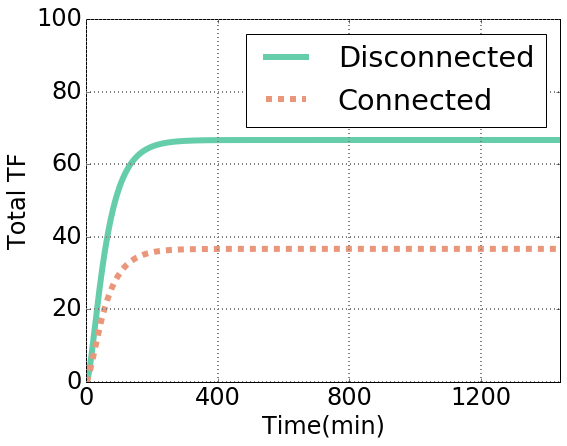

In [15]:

t=np.arange(0,1440,0.01)
##################################################################
ptot2=300
kon=0; koff=0;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=0; kundim=0
k3=0.5
d4=0.02;

k4=0.1*k3;

kon1=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff1=50*60/10;


kon2=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff2=0.03*60/10;

ptot1=0

#####################
#Initial conditions

xob = [0, 0, 0, 0, 0]
xoR = [0, 0, 0, 0, 0]
#####################

#ODEs

def f_1(x,t): 
    return (k2*x[1]-2*kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
soln=odeint(f_1,xob,t)

def f_R(x,t): 
    return (k2*x[1]-2*kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
solnR=odeint(f_R,xoR,t)
##############
#######################################
plt.xticks(np.arange(0, 1440, 400.0))
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 24}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=24) 
matplotlib.rc('ytick', labelsize=24) 
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

p1, =plot(t,soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4], color = '#66cdaa', lw=6)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4], "--",color = '#e9967a',lw=6)

xlabel('Time(min)')
ylabel('Total TF')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Total_A_seq_dim_S_50_deg_koff_entre_100_CSB.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in divide


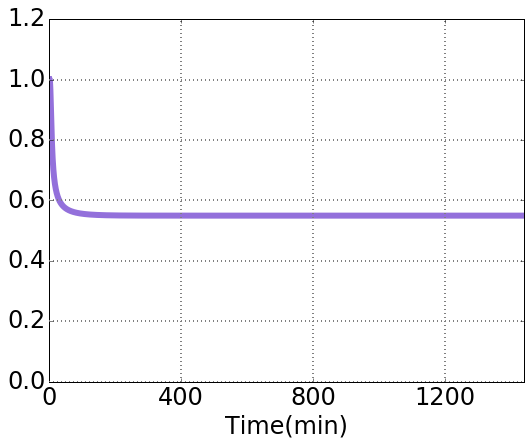

In [16]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4])/(soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4])

b1_1=cosa
plt.xticks(np.arange(0, 1440, 400.0))
plot(t,cosa, color = '#9370db', lw=6)

xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,1.2])
fig.savefig('Total_A_seq_dim_S_50_koff_entre_100_ratio_CSB.eps',format="eps")
show()

In [17]:
#numpy.sum(d**2)
five=solnR[:,0]
four=soln[:,0]
dis=abs(five[5:1440]-four[5:1440])
s=abs(five[5:1440]+four[5:1440])
Canb=dis/s
import numpy
numpy.sum(Canb)

976.44888264776284

In [18]:
import random
import copy
rand = copy.copy(four)
random.shuffle(rand)
rand
dis2=abs(four[5:1440]-rand[5:1440])
s2=abs(four[5:1440]+rand[5:1440])
Canb2=dis2/s2
numpy.sum(Canb2)

1338.9840021677373

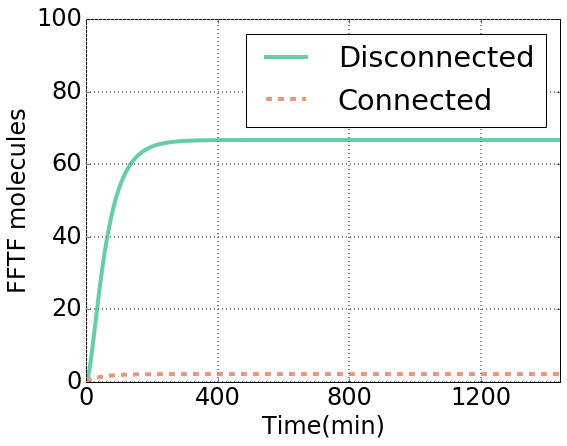

In [19]:
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

plt.xticks(np.arange(0, 1440, 400.0))
p1, =plot(t,soln[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('FFTF molecules')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Free_A_seq_bind_no_dim_S_50_deg_entre_100_koff_Det_strong_2.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in divide


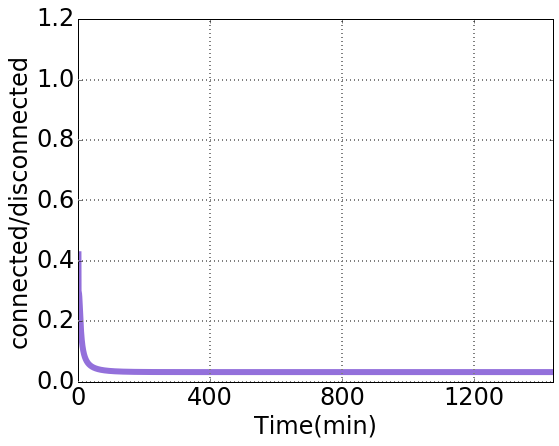

In [20]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

cosa=(solnR[:,0])/(soln[:,0])

l1_1=cosa

plt.xticks(np.arange(0, 1440, 400.0))
plot(t,cosa, color = '#9370db', lw=6)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,1.2])
fig.savefig('Free_A_seq_bind_no_dim_S_50_deg_ratio_entre_100_koff_Det_strong_2.eps',format="eps")
show()

## Total A without TF-operator complex degradation

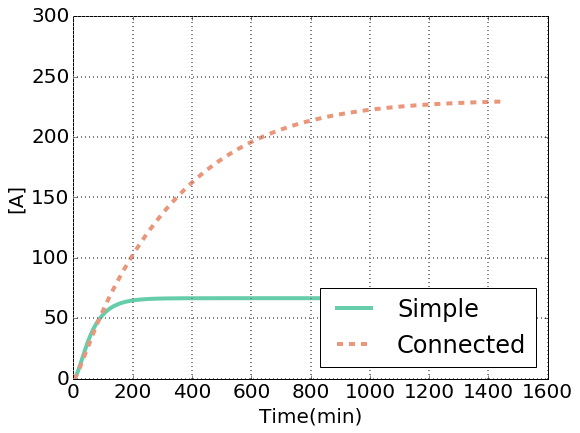

In [21]:

t=np.arange(0,1440,0.01)

##################
S=50.0; d=0.02 ;d2=0.06; d3=0.02; k=0.09/50; k2=0.8;
a=0.01;


d4=0

ptot2=300


kon1=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff1=50*60;


kon2=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff2=0.03*60;

ptot1=0

#####################
#Initial conditions

xob = [0, 0, 0, 0, 0]
xoR = [0, 0, 0, 0, 0]
#####################

#ODEs

def f_1(x,t): 
    return (k2*x[1]-2*kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
soln=odeint(f_1,xob,t)

def f_R(x,t): 
    return (k2*x[1]-2*kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
solnR=odeint(f_R,xoR,t)
##############
################################

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

p1, =plot(t,soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Total_seq_bind_weak_GRAPH2.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in divide


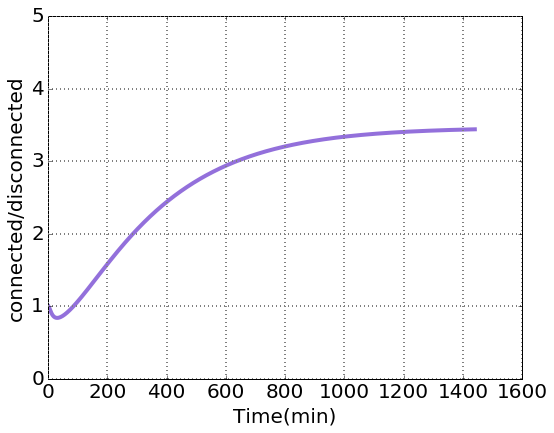

In [22]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4])/(soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4])

a2=cosa

plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
#fig.savefig('Total_A_seq_bin_weak.eps',format="eps")
show()

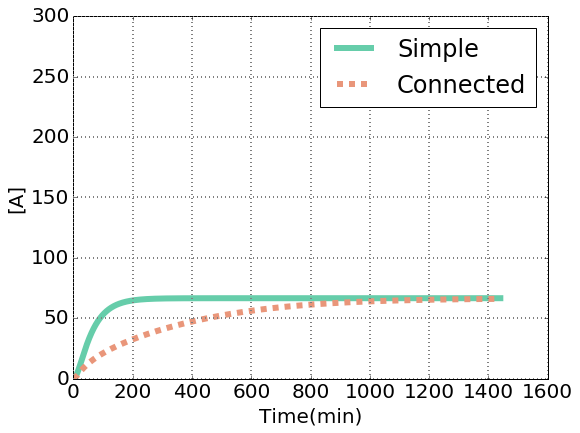

In [23]:

pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

p1, =plot(t,soln[:,0], color = '#66cdaa', lw=6)
p2, =plot(t,solnR[:,0], "--",color = '#e9967a',lw=6)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=1)
#fig.savefig('Free_seq_bind_weak_no_deg.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in divide


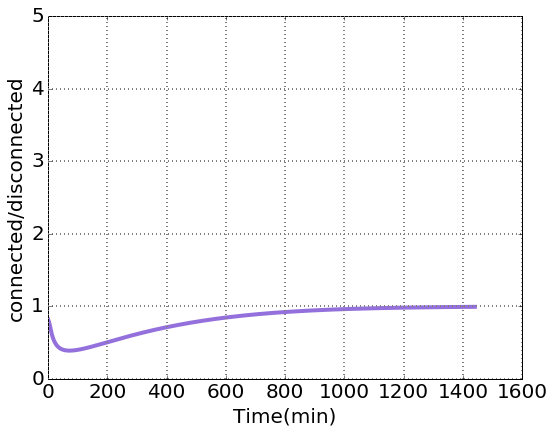

In [24]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

cosa=(solnR[:,0])/(soln[:,0])

c2=cosa

plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
#fig.savefig('Free_A_seq_bin_weak_no_deg.eps',format="eps")
show()

## Total A without TF-operator complex degradation and kon=10kon

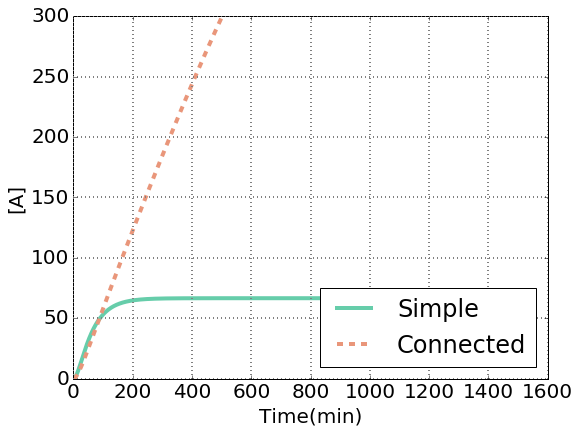

In [25]:

t=np.arange(0,1440,0.01)

##################
S=50.0; d=0.02 ;d2=0.06; d3=0.02; k=0.09/50; k2=0.8;
a=0.01;


d4=0

ptot2=300


kon1=10*(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff1=50*60;


kon2=10*(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff2=0.03*60;

ptot1=0

#####################
#Initial conditions

xob = [0, 0, 0, 0, 0]
xoR = [0, 0, 0, 0, 0]
#####################

#ODEs

def f_1(x,t): 
    return (k2*x[1]-2*kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
soln=odeint(f_1,xob,t)

def f_R(x,t): 
    return (k2*x[1]-2*kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
solnR=odeint(f_R,xoR,t)
##############
################################

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

p1, =plot(t,soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Total_seq_bind_weak_GRAPH2.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


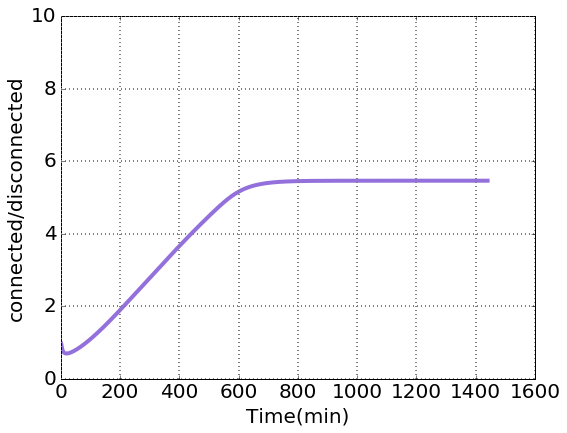

In [26]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4])/(soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4])
b2=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,10])
#fig.savefig('Total_A_seq_bind_strong_ratio_no_deg.eps',format="eps")
show()

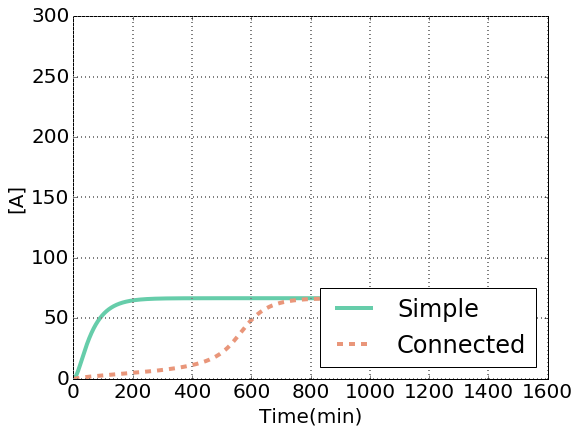

In [27]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Free_A_no_deg_seq_bin.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


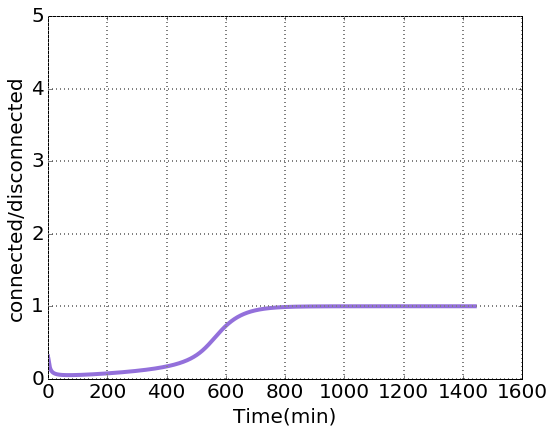

In [28]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0])/(soln[:,0])
l2=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
#fig.savefig('Free_A_seq_bind_strong_no_deg.eps',format="eps")
show()

## Total A No deg de complejo koff/100

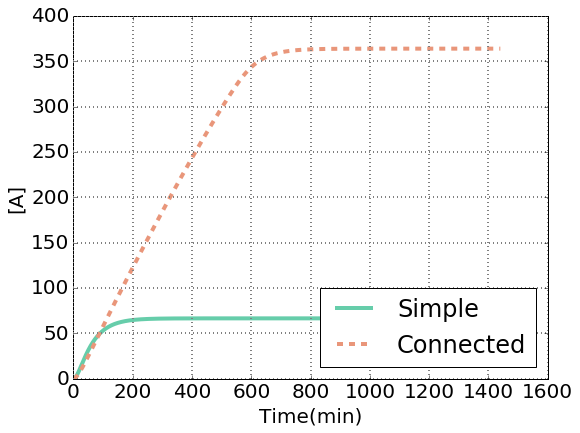

In [29]:

t=np.arange(0,1440,0.01)

##################
S=50.0; d=0.02 ;d2=0.06; d3=0.02; k=0.09/50; k2=0.8;
a=0.01;


d4=0

ptot2=300


kon1=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff1=50*60/10;


kon2=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff2=0.03*60/10;

ptot1=0

#####################
#Initial conditions

xob = [0, 0, 0, 0, 0]
xoR = [0, 0, 0, 0, 0]
#####################

#ODEs

def f_1(x,t): 
    return (k2*x[1]-2*kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
soln=odeint(f_1,xob,t)

def f_R(x,t): 
    return (k2*x[1]-2*kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
solnR=odeint(f_R,xoR,t)
##############
################################

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,400])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

p1, =plot(t,soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Total_seq_bind_weak_GRAPH2.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


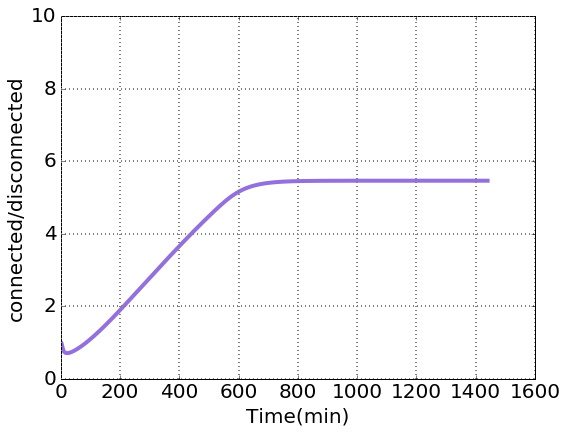

In [30]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4])/(soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4])
b2_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,10])
#fig.savefig('Total_A_seq_bind_ratio_strong_koff_10_no_deg.eps',format="eps")
show()

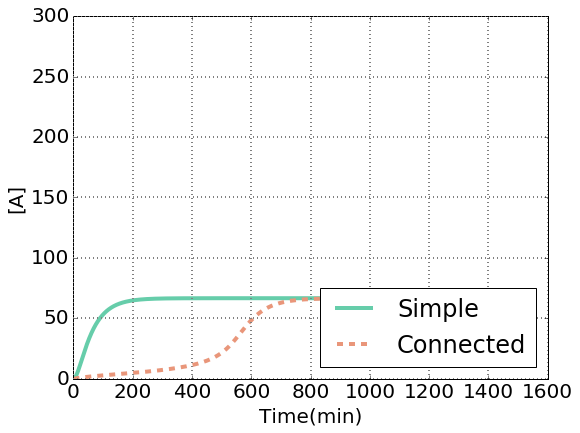

In [31]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Free_A_no_deg_seq_bin_koff_10.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


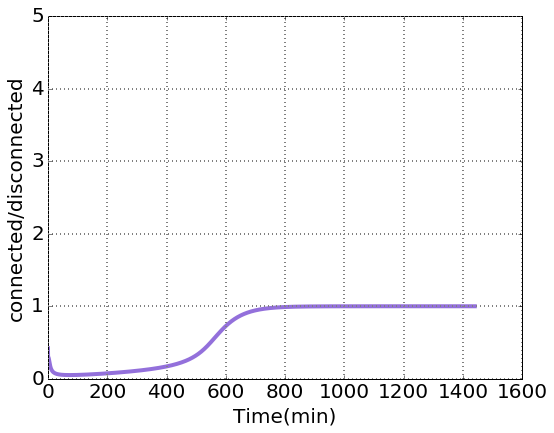

In [32]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0])/(soln[:,0])
l2_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
#fig.savefig('Free_A_seq_bind_strong_no_deg.eps',format="eps")
show()

## Total A deg 0.25

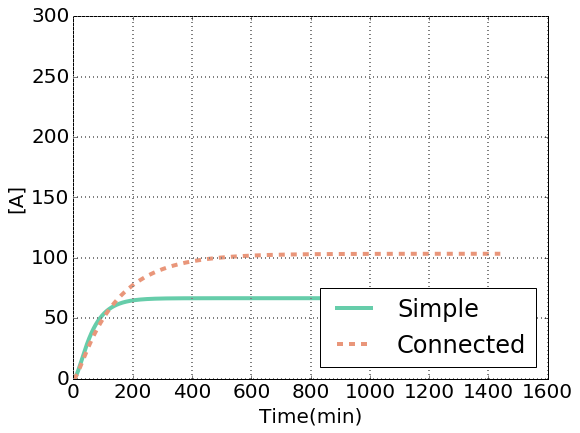

In [33]:

t=np.arange(0,1440,0.01)

##################
S=50.0; d=0.02 ;d2=0.06; d3=0.02; k=0.09/50; k2=0.8;
a=0.01;


d4=0.25*d

ptot2=300


kon1=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff1=50*60;


kon2=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff2=0.03*60;

ptot1=0

#####################
#Initial conditions

xob = [0, 0, 0, 0, 0]
xoR = [0, 0, 0, 0, 0]
#####################

#ODEs

def f_1(x,t): 
    return (k2*x[1]-2*kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
soln=odeint(f_1,xob,t)

def f_R(x,t): 
    return (k2*x[1]-2*kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
solnR=odeint(f_R,xoR,t)
##############
################################

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

p1, =plot(t,soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Total_seq_bind_weak_GRAPH2.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


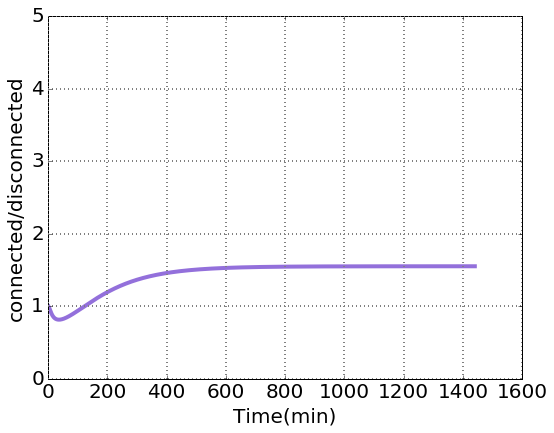

In [34]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4])/(soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4])
a3=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
#fig.savefig('Total_A_quinto_S_50_025_deg_ratio_GRAPH2.eps',format="eps")
show()

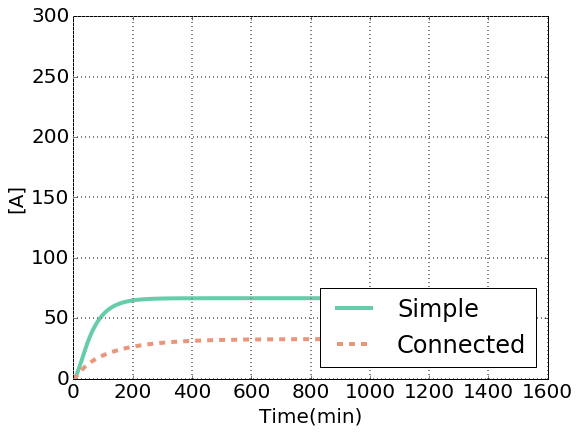

In [35]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Free_A_seq_bind_S_50_0.25_deg_GRAPH2.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


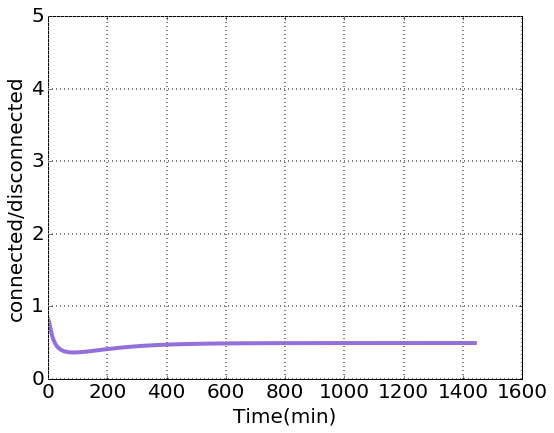

In [36]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0])/(soln[:,0])
c3=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
#fig.savefig('Free_A_seq_bind_S_50_025_deg_ratio_GRAPH2.eps',format="eps")
show()

## Total A deg 0.25 strong

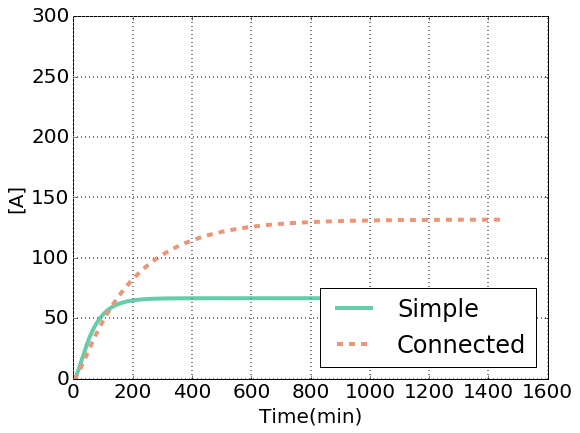

In [37]:

t=np.arange(0,1440,0.01)

##################
S=50.0; d=0.02 ;d2=0.06; d3=0.02; k=0.09/50; k2=0.8;
a=0.01;


d4=0.25*d

ptot2=300


kon1=10*(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff1=50*60;


kon2=10*(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff2=0.03*60;

ptot1=0

#####################
#Initial conditions

xob = [0, 0, 0, 0, 0]
xoR = [0, 0, 0, 0, 0]
#####################

#ODEs

def f_1(x,t): 
    return (k2*x[1]-2*kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
soln=odeint(f_1,xob,t)

def f_R(x,t): 
    return (k2*x[1]-2*kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
solnR=odeint(f_R,xoR,t)
##############
################################

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

p1, =plot(t,soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Total_seq_bind_weak_GRAPH2.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


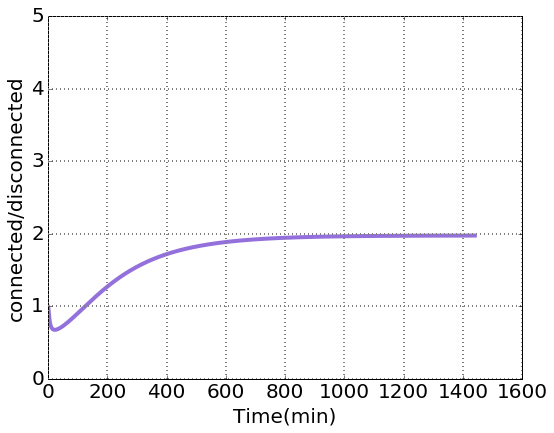

In [38]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4])/(soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4])
b3=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
#fig.savefig('Total_A_seq_dim_S_50_025_deg_ratio_strong.eps',format="eps")
show()

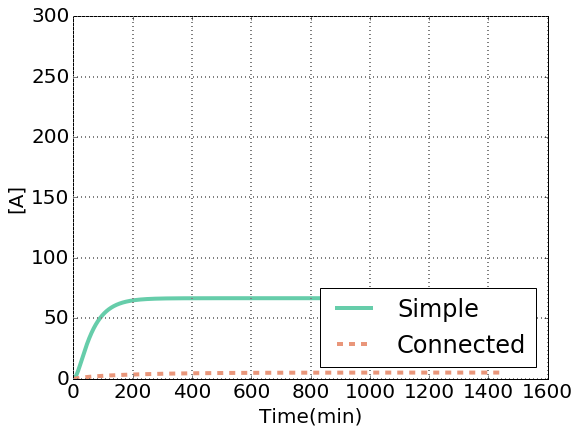

In [39]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Free_A_seq_bind_S_50_025_deg_strong.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


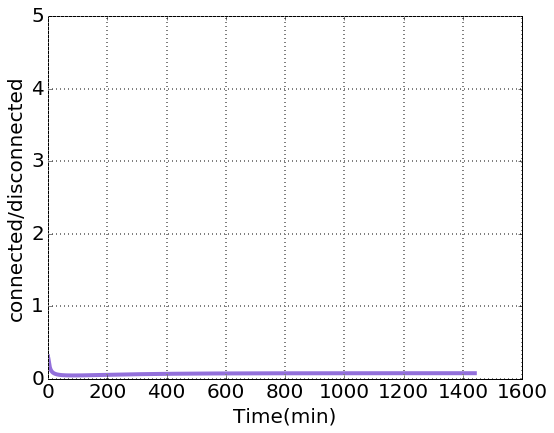

In [40]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0])/(soln[:,0])
l3=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
#fig.savefig('Free_A_seq_bind_S_50_025_deg_ratio_strong.eps',format="eps")
show()

## Total A deg 0.25 strong koff/10

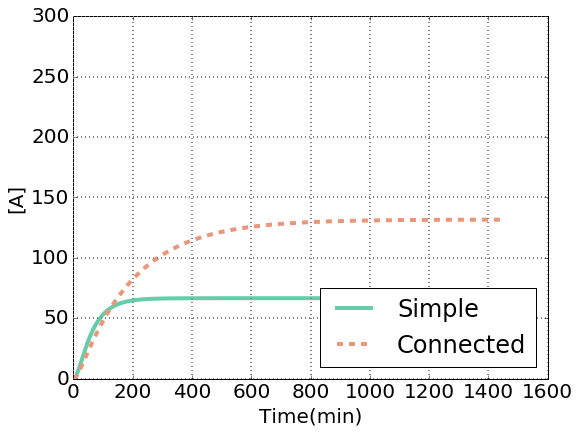

In [41]:

t=np.arange(0,1440,0.01)

##################
S=50.0; d=0.02 ;d2=0.06; d3=0.02; k=0.09/50; k2=0.8;
a=0.01;


d4=0.25*d

ptot2=300


kon1=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff1=50*60/10;


kon2=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff2=0.03*60/10;

ptot1=0

#####################
#Initial conditions

xob = [0, 0, 0, 0, 0]
xoR = [0, 0, 0, 0, 0]
#####################

#ODEs

def f_1(x,t): 
    return (k2*x[1]-2*kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
soln=odeint(f_1,xob,t)

def f_R(x,t): 
    return (k2*x[1]-2*kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
solnR=odeint(f_R,xoR,t)
##############
################################

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

p1, =plot(t,soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Total_seq_bind_weak_GRAPH2.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


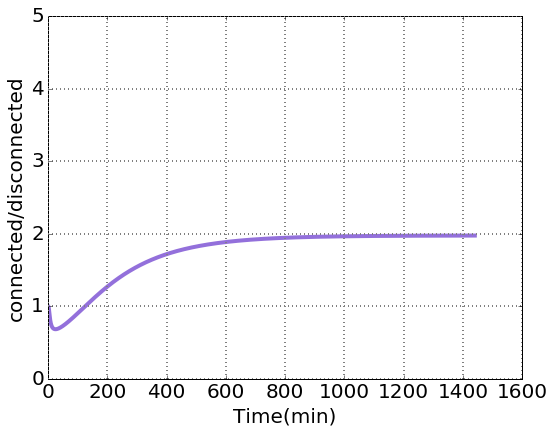

In [42]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4])/(soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4])
b3_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
#fig.savefig('Total_A_seq_dim_S_50_025_deg_ratio_strong_koff_10.eps',format="eps")
show()

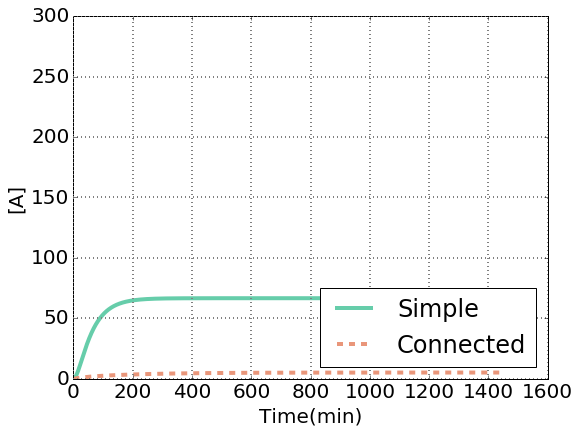

In [43]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Free_A_seq_bind_S_50_025_deg_strong_koff_10.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


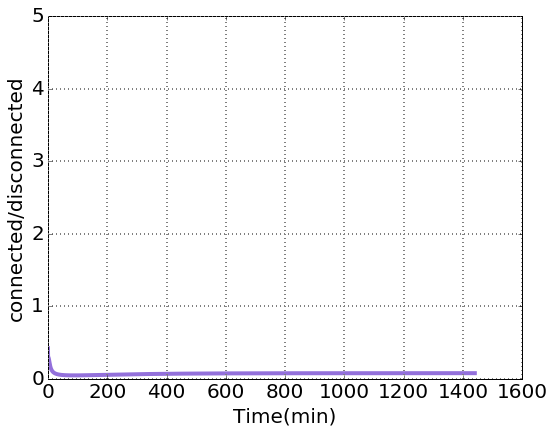

In [44]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0])/(soln[:,0])
l3_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
#fig.savefig('Free_A_seq_bind_S_50_025_deg_ratio_strong_koff_10.eps',format="eps")
show()

## Total A deg 0.5

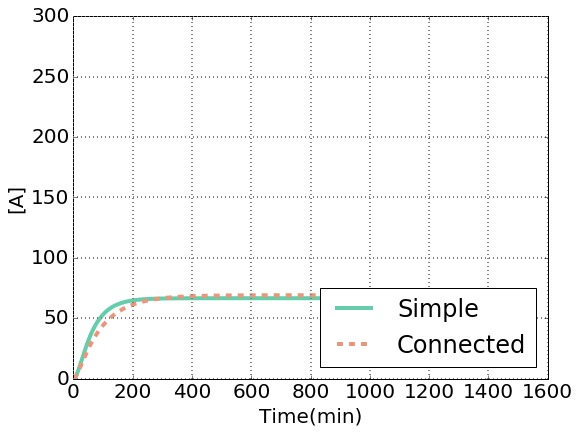

In [45]:

t=np.arange(0,1440,0.01)

##################
S=50.0; d=0.02 ;d2=0.06; d3=0.02; k=0.09/50; k2=0.8;
a=0.01;


d4=0.5*d

ptot2=300


kon1=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff1=50*60;


kon2=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff2=0.03*60;

ptot1=0

#####################
#Initial conditions

xob = [0, 0, 0, 0, 0]
xoR = [0, 0, 0, 0, 0]
#####################

#ODEs

def f_1(x,t): 
    return (k2*x[1]-2*kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
soln=odeint(f_1,xob,t)

def f_R(x,t): 
    return (k2*x[1]-2*kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
solnR=odeint(f_R,xoR,t)
##############
################################

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

p1, =plot(t,soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Total_seq_bind_weak_GRAPH2.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


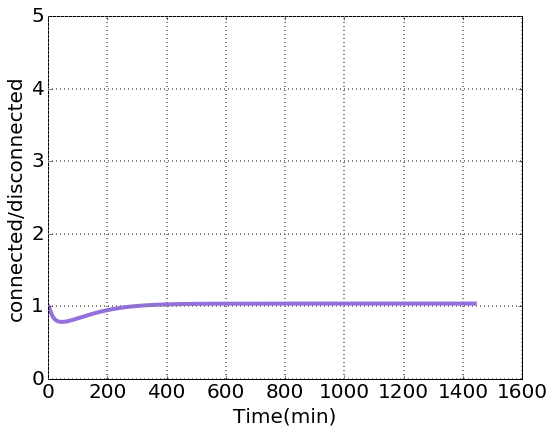

In [46]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4])/(soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4])
a4=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
#fig.savefig('Total_A_seq_bind_S_50_05_deg_ratio_weak.eps',format="eps")
show()

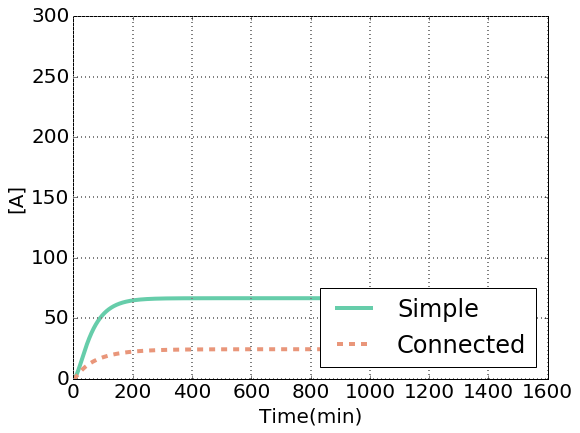

In [47]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Free_A_seq_bind_S_50_0.25_deg_weak.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


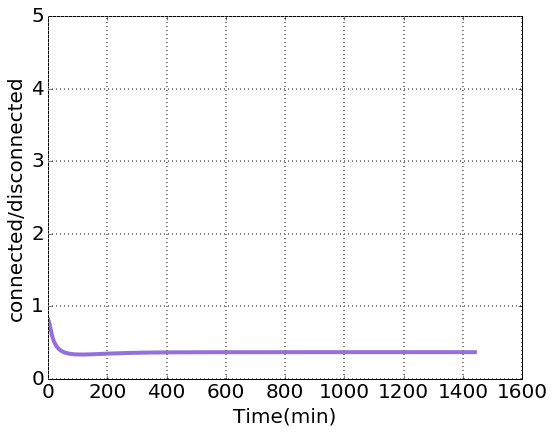

In [48]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0])/(soln[:,0])
c4=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
#fig.savefig('Free_A_seq_deg_S_50_05_deg_ratio_weak.eps',format="eps")
show()

## Total A deg 0.5 100 kon

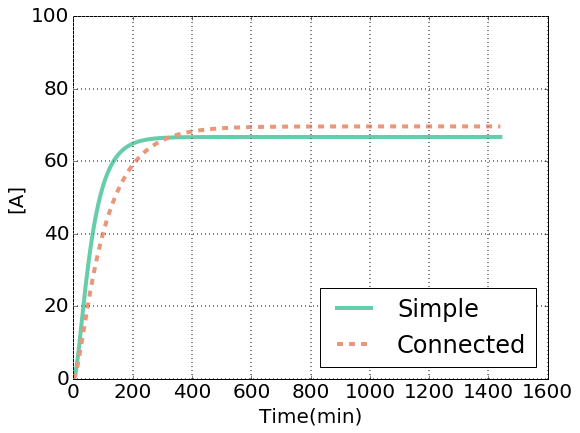

In [49]:

t=np.arange(0,1440,0.01)

##################
S=50.0; d=0.02 ;d2=0.06; d3=0.02; k=0.09/50; k2=0.8;
a=0.01;


d4=0.5*d

ptot2=300


kon1=10*(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff1=50*60;


kon2=10*(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff2=0.03*60;

ptot1=0

#####################
#Initial conditions

xob = [0, 0, 0, 0, 0]
xoR = [0, 0, 0, 0, 0]
#####################

#ODEs

def f_1(x,t): 
    return (k2*x[1]-2*kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
soln=odeint(f_1,xob,t)

def f_R(x,t): 
    return (k2*x[1]-2*kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
solnR=odeint(f_R,xoR,t)
##############
################################

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

p1, =plot(t,soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Total_seq_bind_weak_GRAPH2.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


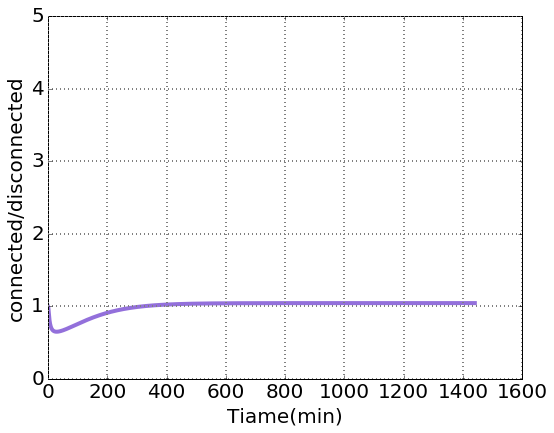

In [50]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4])/(soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4])
b4=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Tiame(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
#fig.savefig('Total_A_seq_bind_S_50_05_deg_ratio_strong.eps',format="eps")
show()

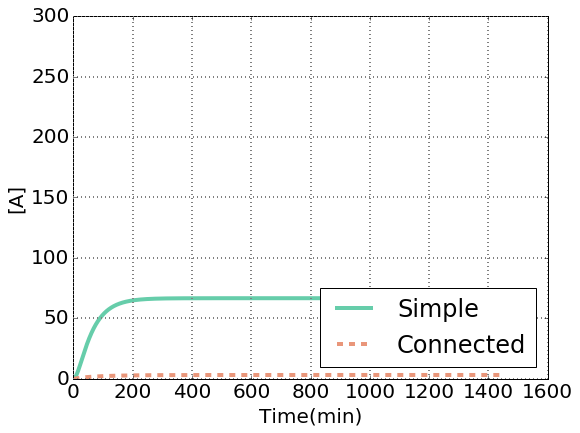

In [51]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Free_A_seq_bind_S_50_05_deg_100kon_strong.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


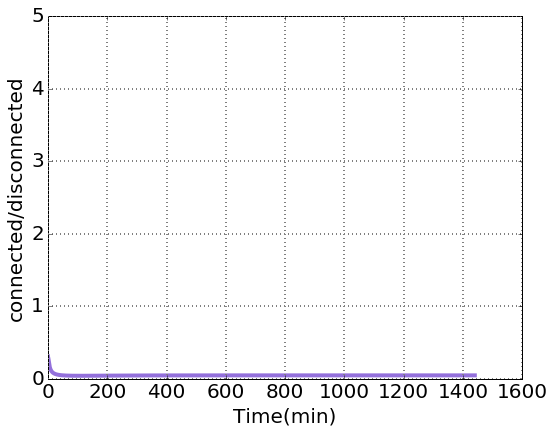

In [52]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0])/(soln[:,0])
l4=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
#fig.savefig('Free_A_seq_bind_S_50_05_deg_ratio_strong.eps',format="eps")
show()

## Total A deg 0.5 koff/100

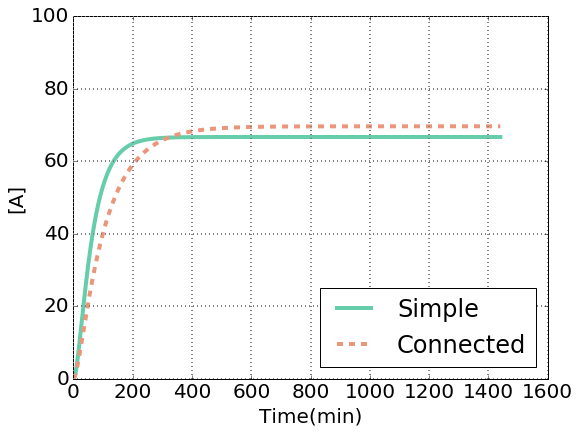

In [53]:

t=np.arange(0,1440,0.01)

##################
S=50.0; d=0.02 ;d2=0.06; d3=0.02; k=0.09/50; k2=0.8;
a=0.01;


d4=0.5*d

ptot2=300


kon1=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff1=50*60/10;


kon2=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff2=0.03*60/10;

ptot1=0

#####################
#Initial conditions

xob = [0, 0, 0, 0, 0]
xoR = [0, 0, 0, 0, 0]
#####################

#ODEs

def f_1(x,t): 
    return (k2*x[1]-2*kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
soln=odeint(f_1,xob,t)

def f_R(x,t): 
    return (k2*x[1]-2*kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
solnR=odeint(f_R,xoR,t)
##############
################################

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

p1, =plot(t,soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Total_seq_bind_weak_GRAPH2.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


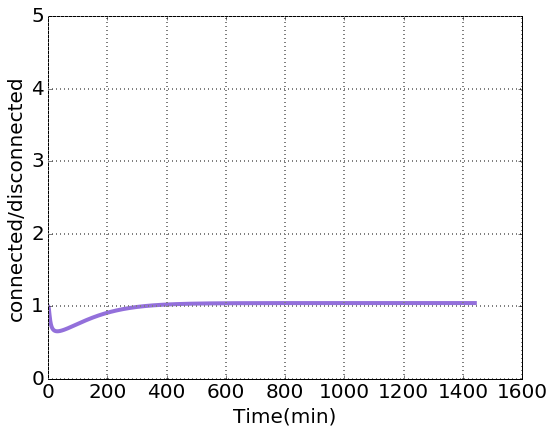

In [54]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4])/(soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4])
b4_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
#fig.savefig('Total_A_seq_bind_S_50_05_deg_ratio_strong_koff_entre_10.eps',format="eps")
show()

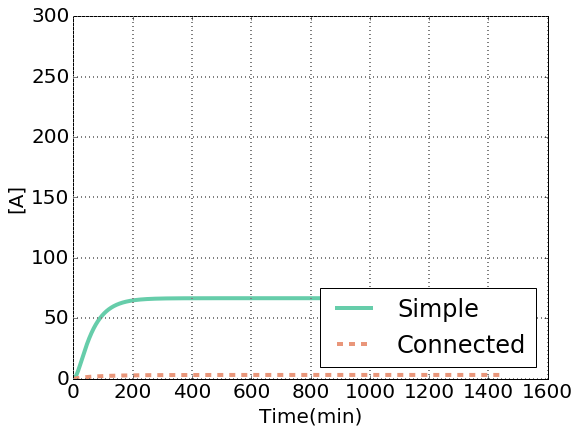

In [55]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Free_A_seq_bind_S_50_05_deg_100kon_strong_koff_entre_10.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


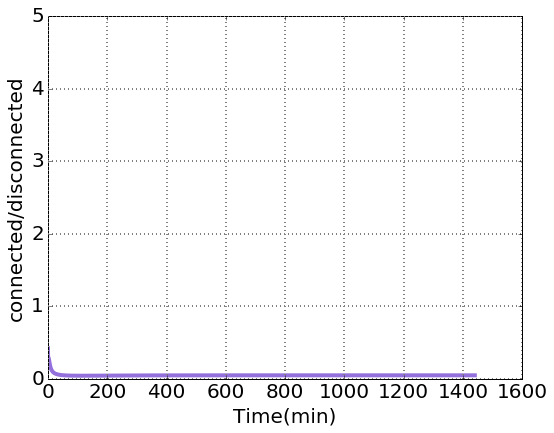

In [56]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0])/(soln[:,0])
l4_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
#fig.savefig('Free_A_seq_bind_S_50_05_deg_ratio_strong_koff_entre_10.eps',format="eps")
show()

## Total A deg 2

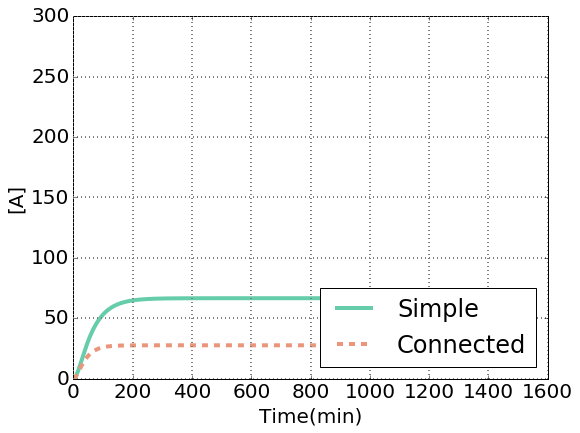

In [57]:

t=np.arange(0,1440,0.01)

##################
S=50.0; d=0.02 ;d2=0.06; d3=0.02; k=0.09/50; k2=0.8;
a=0.01;


d4=2*d

ptot2=300


kon1=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff1=50*60;


kon2=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff2=0.03*60;

ptot1=0

#####################
#Initial conditions

xob = [0, 0, 0, 0, 0]
xoR = [0, 0, 0, 0, 0]
#####################

#ODEs

def f_1(x,t): 
    return (k2*x[1]-2*kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
soln=odeint(f_1,xob,t)

def f_R(x,t): 
    return (k2*x[1]-2*kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
solnR=odeint(f_R,xoR,t)
##############
################################

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

p1, =plot(t,soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Total_seq_bind_weak_GRAPH2.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


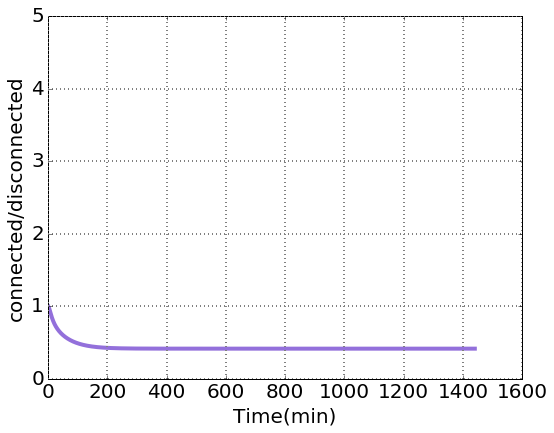

In [58]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4])/(soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4])
a5=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
#fig.savefig('Total_A_quinto_S_50_2_deg_ratio_GRAPH2.eps',format="eps")
show()

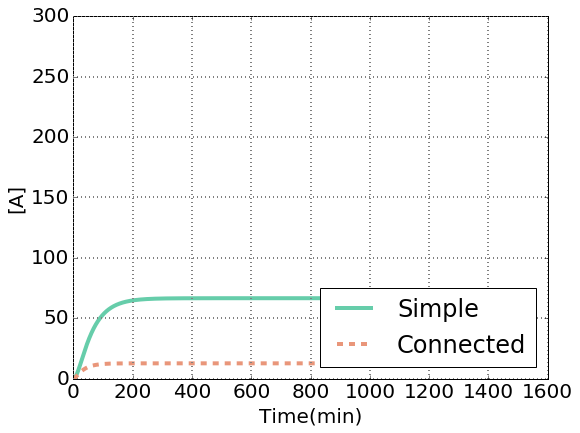

In [59]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Free_A_seq_bind_S_50_2_deg_weak.eps',format="eps")
show()




C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


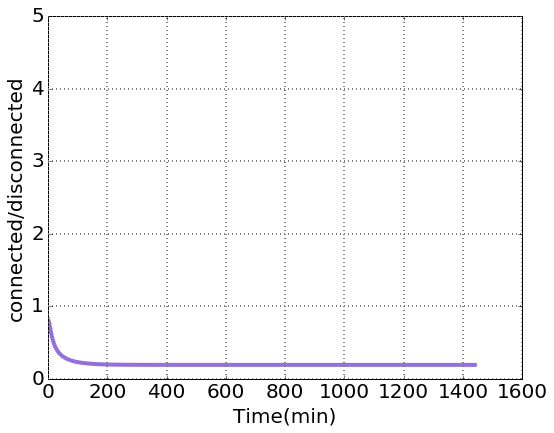

In [60]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0])/(soln[:,0])
c5=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
#fig.savefig('Free_A_seq_bind_S_50_2_deg_ratio_weak.eps',format="eps")
show()

## Total A deg 2 kon 100

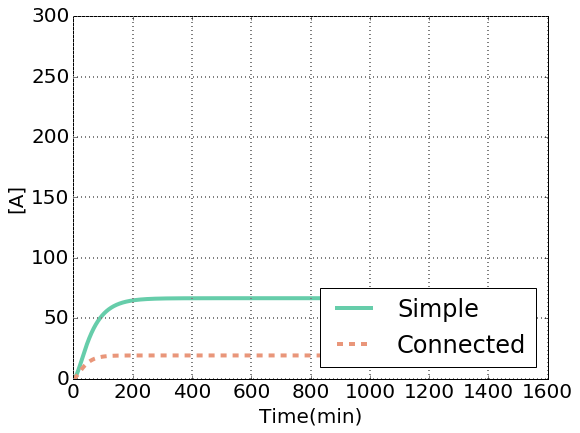

In [61]:

t=np.arange(0,1440,0.01)

##################
S=50.0; d=0.02 ;d2=0.06; d3=0.02; k=0.09/50; k2=0.8;
a=0.01;


d4=2*d

ptot2=300


kon1=10*(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff1=50*60;


kon2=10*(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff2=0.03*60;

ptot1=0

#####################
#Initial conditions

xob = [0, 0, 0, 0, 0]
xoR = [0, 0, 0, 0, 0]
#####################

#ODEs

def f_1(x,t): 
    return (k2*x[1]-2*kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
soln=odeint(f_1,xob,t)

def f_R(x,t): 
    return (k2*x[1]-2*kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
solnR=odeint(f_R,xoR,t)
##############
################################

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

p1, =plot(t,soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Total_seq_bind_weak_GRAPH2.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


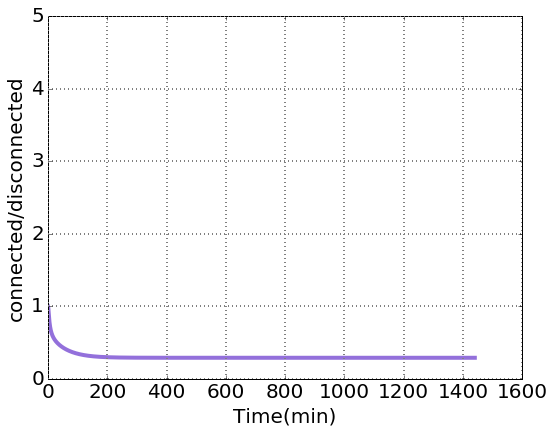

In [62]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4])/(soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4])
b5=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
#fig.savefig('Total_A_seq_bind_S_50_2_deg_ratio_GRAPH2_strong.eps',format="eps")
show()

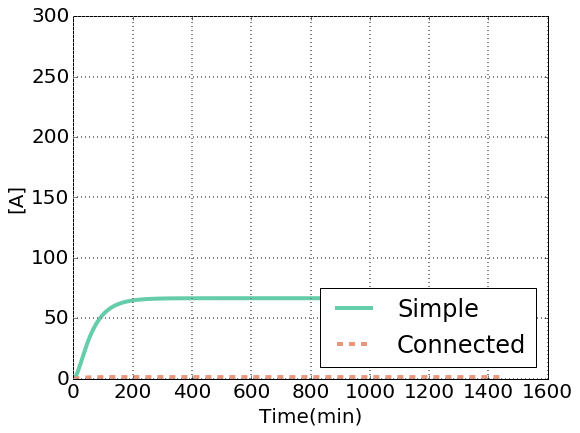

In [63]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Free_A_seq_bind_S_50_2_deg_strong.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


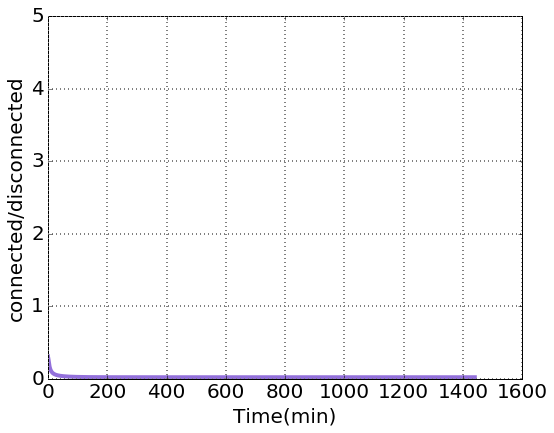

In [64]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0])/(soln[:,0])
l5=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
#fig.savefig('Free_A_seq_bind_S_50_2_deg_ratio_strong.eps',format="eps")
show()

# Total A deg 2 koff/ 100

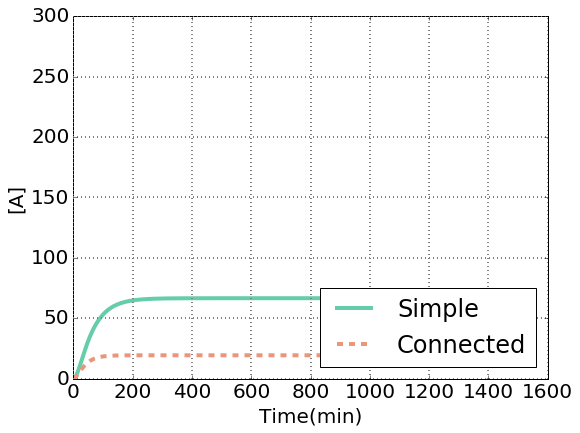

In [65]:

t=np.arange(0,1440,0.01)

##################
S=50.0; d=0.02 ;d2=0.06; d3=0.02; k=0.09/50; k2=0.8;
a=0.01;


d4=2*d

ptot2=300


kon1=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff1=50*60/10;


kon2=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff2=0.03*60/10;

ptot1=0

#####################
#Initial conditions

xob = [0, 0, 0, 0, 0]
xoR = [0, 0, 0, 0, 0]
#####################

#ODEs

def f_1(x,t): 
    return (k2*x[1]-2*kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot1-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
soln=odeint(f_1,xob,t)

def f_R(x,t): 
    return (k2*x[1]-2*kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]+koff1*(x[3]+x[4])-kon2*x[0]*(x[3]+x[4])+2*koff2*x[2]-d*x[0],
    a+(k*S)-d2*x[1],
    kon2*x[0]*(x[3]+x[4])-2*koff2*x[2] - d4*x[2],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[3]-kon2*x[3]*x[0]+koff2*x[2]-d4*x[3],
    kon1*(ptot2-(x[2]+x[3]+x[4]))*x[0]-koff1*x[4]-kon2*x[4]*x[0]+koff2*x[2]-d4*x[4])
solnR=odeint(f_R,xoR,t)
##############
################################

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

p1, =plot(t,soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Total_seq_bind_weak_GRAPH2.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


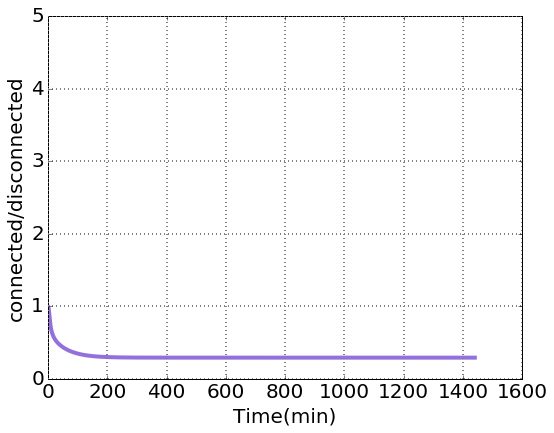

In [66]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4])/(soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4])
b5_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
#fig.savefig('Total_A_seq_bind_S_50_2_deg_ratio_GRAPH2_strong_koff_entre_10.eps',format="eps")
show()

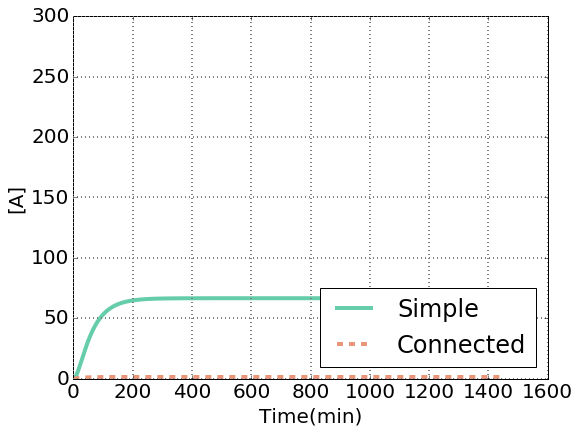

In [67]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Free_A_seq_bind_S_50_2_deg_strong_koff_entre_10.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


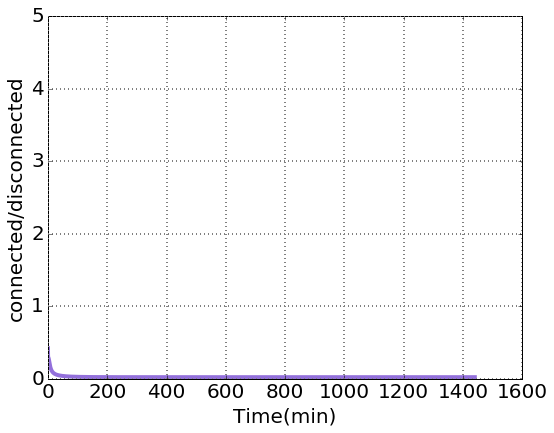

In [68]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0])/(soln[:,0])
l5_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
#fig.savefig('Free_A_seq_bind_S_50_2_deg_ratio_strong_koff_entre_10.eps',format="eps")
show()

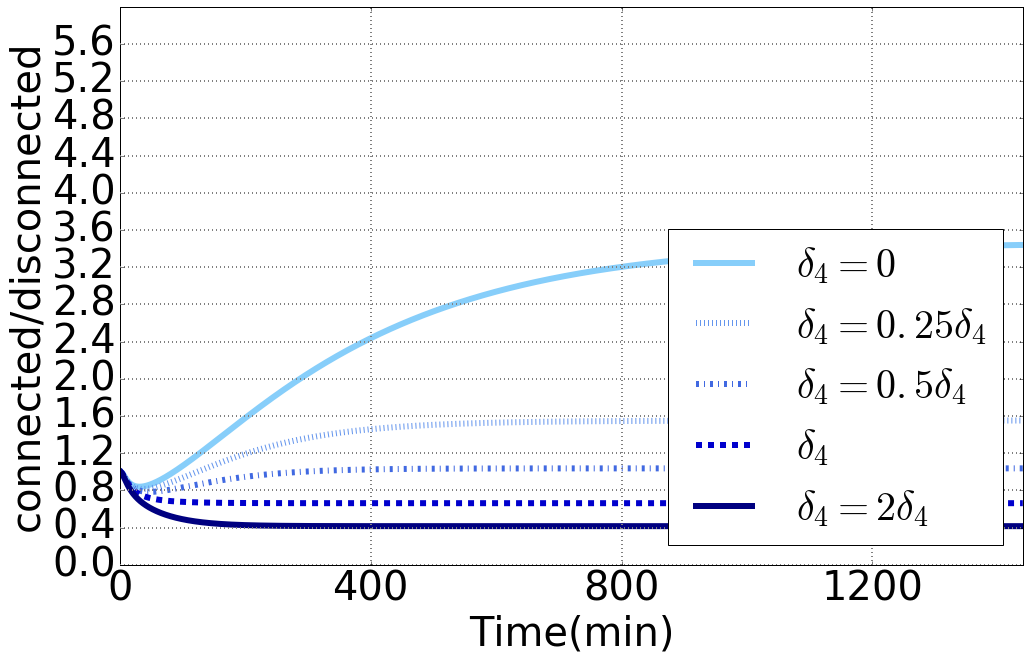

In [69]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 40}
plt.xticks(np.arange(0, 1440, 400.0))
#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a4, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a3, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,a2,color = '#87cefa', lw=6)
line2, =plot(t,a3, ":", color = '#6495ed',lw=6)
line3, =plot(t,a4, "-.", color = '#4169e1', lw=6)
line4, =plot(t,a1, "--", color = '#0000cd',lw=6)
line5, =plot(t,a5, color = '#000080',lw=6)

legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", "$\delta_4=0.5\delta_4$",
                                             "$\delta_4$", "$\delta_4=2\delta_4$"],loc=4, fontsize=40)

xlabel('Time(min)', fontsize=40)
ylabel('connected/disconnected', fontsize=40)
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,6])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

fig.savefig('Total_A_ratios_kon_case_seq_bind_weak_CSB.eps',format="eps")
show()

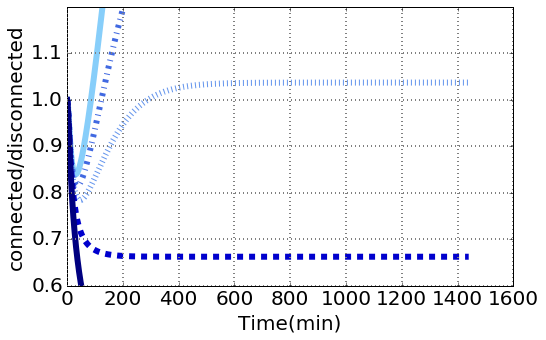

In [70]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(8,5)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a4, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a3, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,a2,color = '#87cefa', lw=6)
line2, =plot(t,a4, ":", color = '#6495ed',lw=6)
line3, =plot(t,a3, "-.", color = '#4169e1', lw=6)
line4, =plot(t,a1, "--", color = '#0000cd',lw=6)
line5, =plot(t,a5, color = '#000080',lw=6)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0.6,1.2])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.1))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

#fig.savefig('Total_A_Mini_seq_bind_kon_case_weak.eps',format="eps")
show()

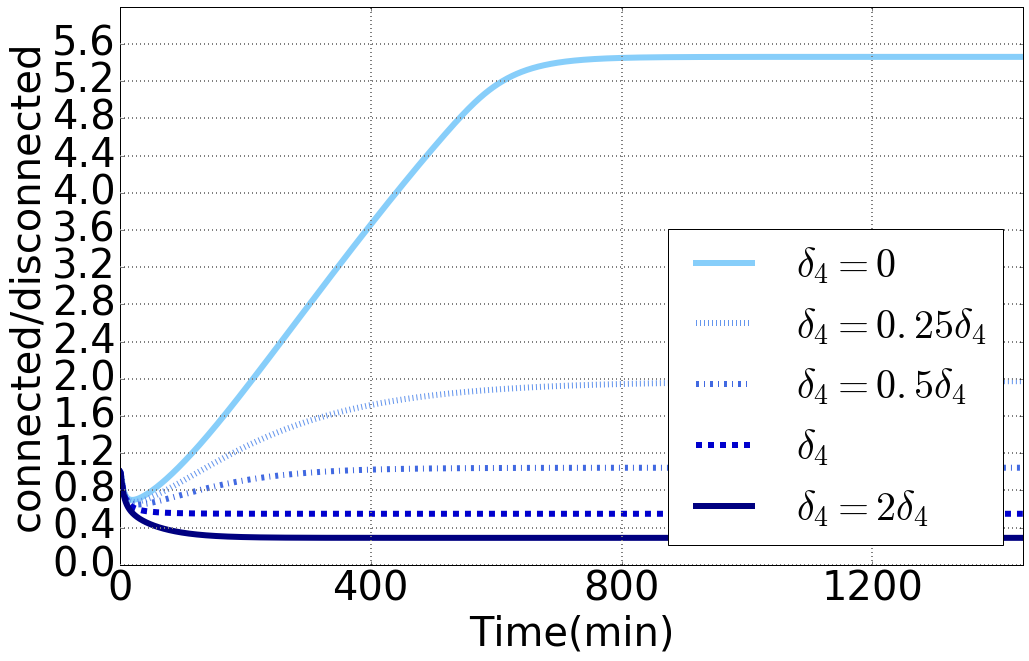

In [71]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40)
from pylab import *
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 40}
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)
plt.xticks(np.arange(0, 1440, 400.0))
line1, =plot(t,b2,color = '#87cefa', lw=6)
line2, =plot(t,b3, ":", color = '#6495ed',lw=6)
line3, =plot(t,b4, "-.", color = '#4169e1', lw=6)
line4, =plot(t,b1, "--", color = '#0000cd',lw=6)
line5, =plot(t,b5, color = '#000080',lw=6)

legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", 
                                             "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=4, fontsize=40)

xlabel('Time(min)', fontsize=40)
ylabel('connected/disconnected', fontsize=40)
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,6])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Total_A_ratios_strong_100kon_CSB.eps',format="eps")
show()

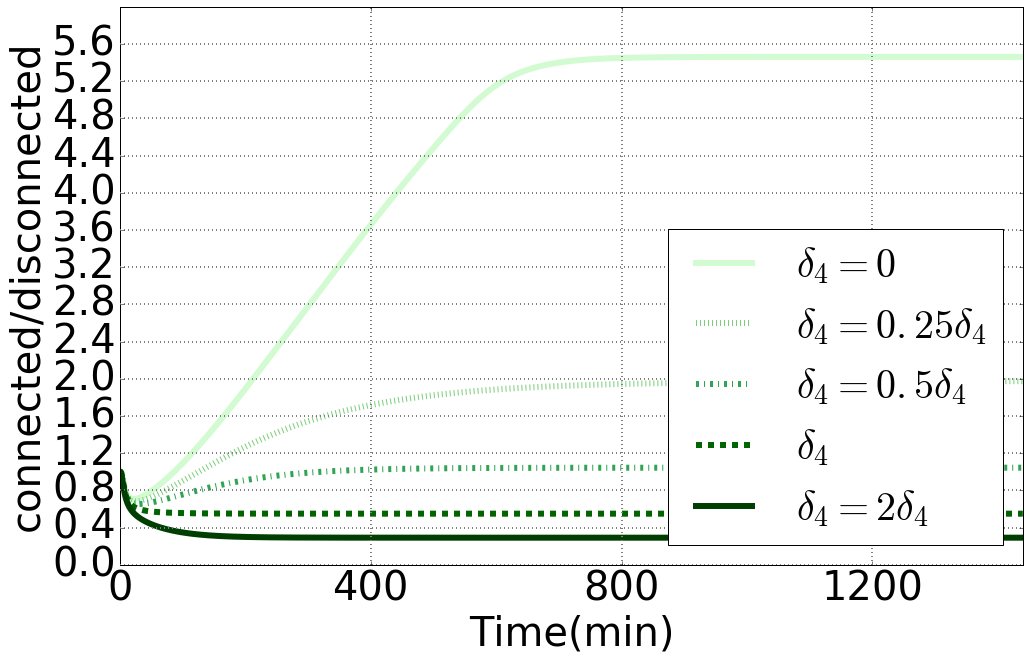

In [72]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 40}


from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)
plt.xticks(np.arange(0, 1440, 400.0))
line1, =plot(t,b2_1,color = '#d2fbd2', lw=6)
line2, =plot(t,b3_1, ":", color = '#7bce7b',lw=6)
line3, =plot(t,b4_1, "-.", color = '#31a354', lw=6)
line4, =plot(t,b1_1, "--", color = '#006400',lw=6)
line5, =plot(t,b5_1, color = '#013e01',lw=6)



legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$",
                                             "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=4, fontsize=40)

xlabel('Time(min)', fontsize=40)
ylabel('connected/disconnected', fontsize=40)
grid('on',lw=2, color="gray")



ax.set_ylim([0,6])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Total_A_ratios_koff100_CSB.eps',format="eps")
show()

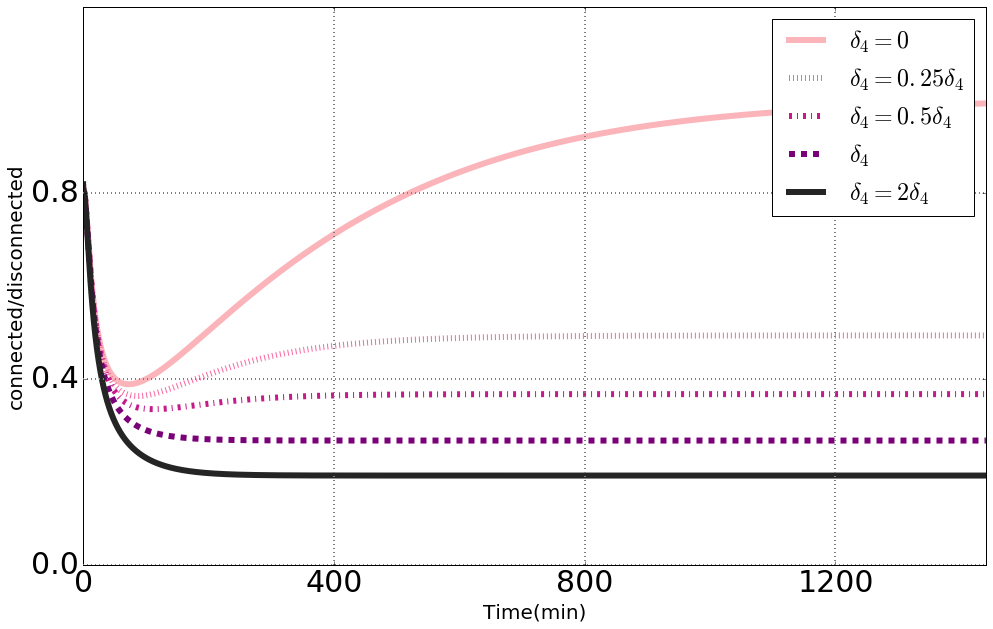

In [73]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)
plt.xticks(np.arange(0, 1440, 400.0))
line1, =plot(t,c2,color = '#FBB4B9', lw=6)
line2, =plot(t,c3, ":", color = '#F768A1',lw=6)
line3, =plot(t,c4, "-.", color = '#C51B8A', lw=6)
line4, =plot(t,c1, "--", color = '#7A0177',lw=6)
line5, =plot(t,c5, color = '#252525',lw=6)

legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", 
                                             "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=1)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,1.2])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Free_A_ratios_case_seq_bind_weak_case_seq_bind_no_dim.eps',format="eps")
show()

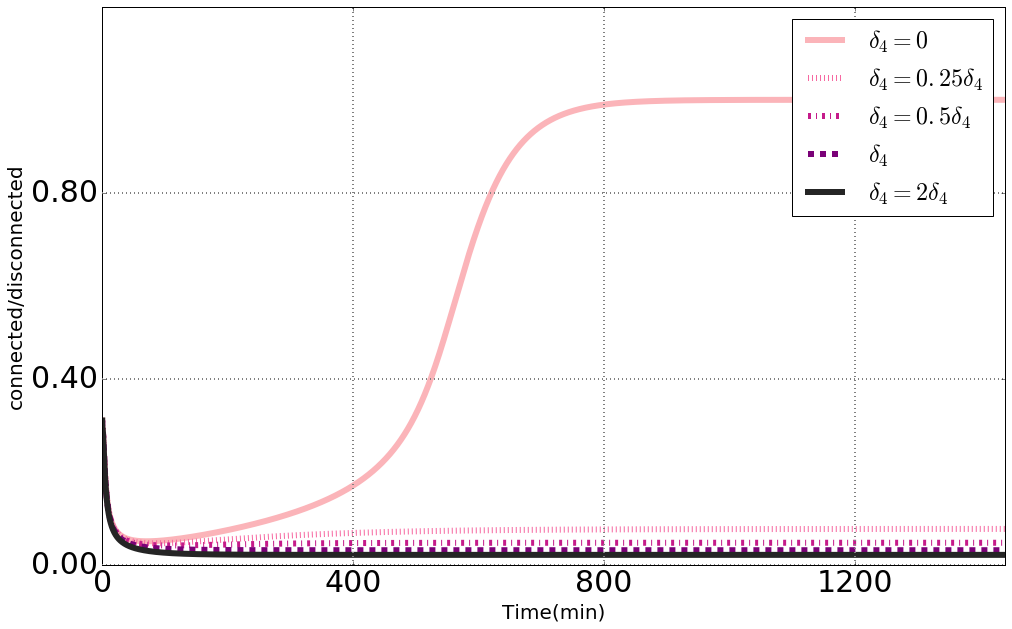

In [74]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)
plt.xticks(np.arange(0, 1440, 400.0))
line1, =plot(t,l2,color = '#FBB4B9', lw=6)
line2, =plot(t,l3, ":", color = '#F768A1',lw=6)
line3, =plot(t,l4, "-.", color = '#C51B8A', lw=6)
line4, =plot(t,l1, "--", color = '#7A0177',lw=6)
line5, =plot(t,l5, color = '#252525',lw=6)

legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", 
                                             "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=1)


xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,1.2])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.02f'))

fig.savefig('Free_A_ratios_case_seq_bind_with_legend_strong_case_seq_bind_no_dim.eps',format="eps")
show()

# Strong operator ratios via koff/100

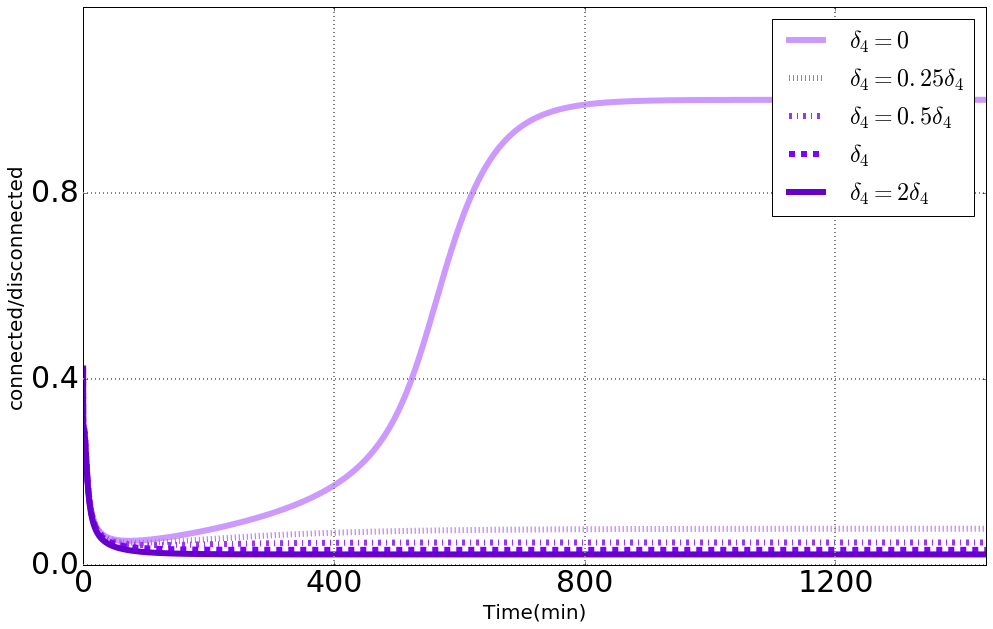

In [75]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

plt.xticks(np.arange(0, 1440, 400.0))

line1, =plot(t,l2_1,color = '#CC99FF', lw=6)
line2, =plot(t,l3_1, ":", color = '#B266FF',lw=6)
line3, =plot(t,l4_1, "-.", color = '#9933FF', lw=6)
line4, =plot(t,l1_1, "--", color = '#7F00FF',lw=6)
line5, =plot(t,l5_1, color = '#6600CC',lw=6)


legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$",
                                             "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=1)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,1.2])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Free_A_ratios_koff_entre_1000_case_seq_bind_no_dim.eps',format="eps")
show()